# Support Vector Machines

## Support Vector Classifier

In [1]:
from ml.svm import SVC
from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

### Linear Kernel

#### Hard Margin

custom svc accuracy score is 1.0
custom svc found 3 support vectors from 150 examples
custom svc w is [-2.05045109  1.79059994]
custom svc b is 0.7629168923188177


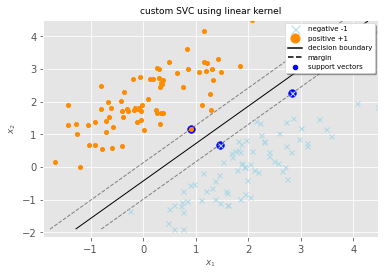

sklearn svc accuracy score is 1.0
sklearn svc found 3 support vectors from 150 examples
sklearn svc w is [[-2.05049587  1.79063965]]
sklearn svc b is [0.76294006]


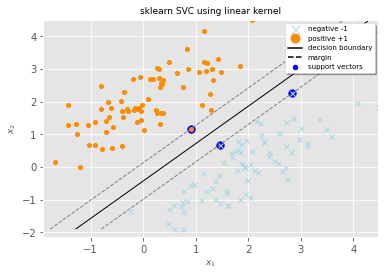

In [2]:
from utils import generate_linearly_separable_data

X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear', C=10).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=10).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### Soft Margin

custom svc accuracy score is 0.96
custom svc found 15 support vectors from 150 examples
custom svc w is [-1.41722758  1.68876615]
custom svc b is -0.39245719633941145


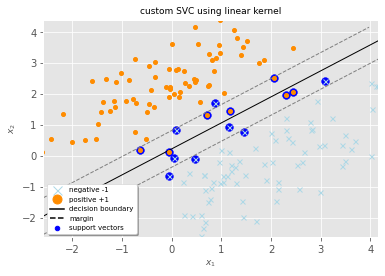

sklearn svc accuracy score is 0.96
sklearn svc found 12 support vectors from 150 examples
sklearn svc w is [[-1.41689746  1.68837835]]
sklearn svc b is [-0.2483759]


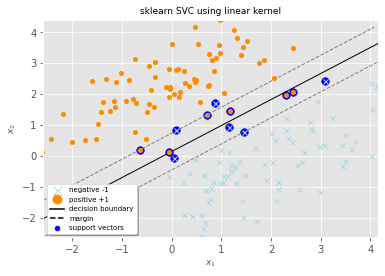

In [3]:
from utils import generate_linearly_separable_overlap_data

X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear', C=100).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=100).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

### Polynomial Kernel

custom svc accuracy score is 1.0
custom svc found 8 support vectors from 150 examples
custom svc b is -0.1700469814946174


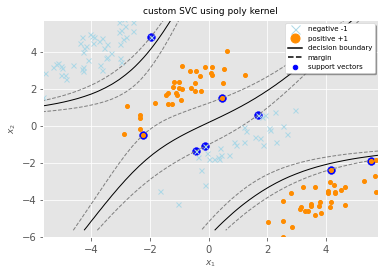

sklearn svc accuracy score is 1.0
sklearn svc found 8 support vectors from 150 examples
sklearn svc b is [-0.16965385]


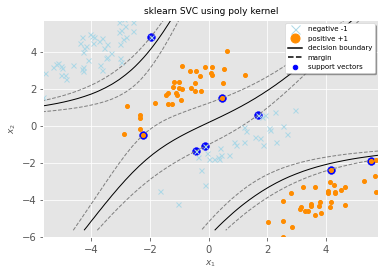

In [7]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='poly', degree=3., coef0=3, gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='poly', degree=3., coef0=3., gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

### RBF Kernel

custom svc accuracy score is 1.0
custom svc found 35 support vectors from 150 examples
custom svc b is -0.04317110301625448


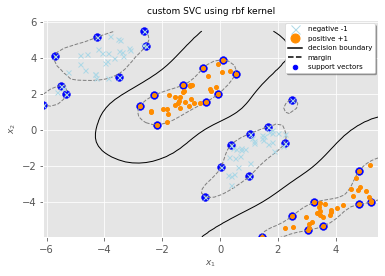

sklearn svc accuracy score is 1.0
sklearn svc found 34 support vectors from 150 examples
sklearn svc b is [-0.04037013]


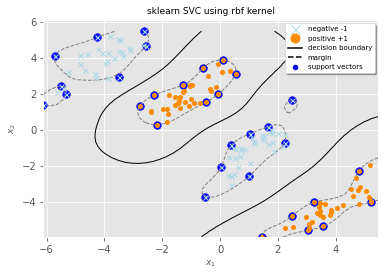

In [9]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

## Support Vector Regression

In [11]:
from ml.svm import SVR
from sklearn.svm import SVR as SKLSVR
from sklearn.model_selection import train_test_split

custom svr r2 score is 0.8615342891870034
custom svr found 19 support vectors from 75 examples
custom svr b is 0.08717615911677887


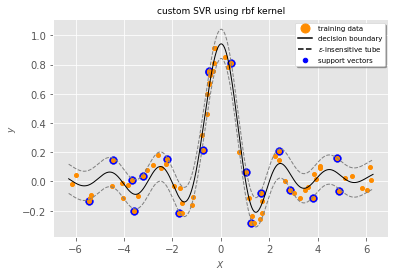

sklearn svr r2 score is 0.864185533682615
sklearn svr found 19 support vectors from 75 examples
sklearn svr b is [0.07669342]


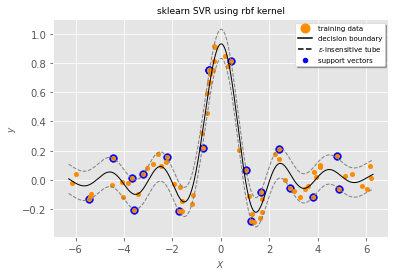

In [12]:
from utils import generate_non_linearly_regression_data

X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = SVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svr r2 score is {svr.score(X_test, y_test)}')
print(f'custom svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'custom svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)

svr = SKLSVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)